# Analyse des données - projet tutoré 2017

### Par texte

   * nb thèmes
   * liste thème
   * répartition des relations
   * affichage graphique de la répartition en pourcentage
   * affichage de l'arbre
   
### Par relation
   * répartition moyenne par fichier
   * répartition moyenne par annotateur
   
   
 


In [2]:
%matplotlib inline

#data analyse functions
from data_analyse import *
from Data import *
from Data_extrait import *
#dataviz
import matplotlib.pyplot as plt
#system interaction
import glob, sys, os
from collections import Counter
from operator import itemgetter

#jupyter display & widgets
from IPython import display
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.core.display import HTML,display

#graphviz
import graphviz as gv
from IPython.display import SVG
from graphviz import Source

In [2]:
files = glob.glob('textes_emilie_laurine/VRAIS_TESTS/*/*.aa')
files = [f.split('/').pop() for f in files]

### Analyses quantitative par texte

In [3]:
def f1(x):
    #definition variables
    var = 'textes_emilie_laurine/VRAIS_TESTS/'+x[0:3]+'*'+'/'
    files = glob.glob(var)
    dirr = os.path.basename(files[0])
    
    data = Data(files[0]+x)
    
    
    print(data.after_data)
    display(HTML("<h1>Infos générales</h1>"))
    print(data.after_data['age'])
    print(data.after_data['statut'])

    #affichage du nombre de thèmes
    display(HTML("<h1>Nombre de unité</h1>"))
    # print("  "+str(data.nbthemes))
    # print(data.nb_unit())
    
    #affichage des thèmes
    display(HTML("<h1>Liste de thèmes</h1>"))
    data.display_themes()
    
    #affichage des relations
    display(HTML("<h1>Liste de relations</h1>"))
    #relations_print(xml)
    c = data.relations_count
    for itm in c:
        print("  ->"+itm+" :"+ str(c[itm]))
    
    plt.clf()
    poub = plt.figure(figsize=(8,8))
    labels = [k for k in c]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#d9ffb3','#ffe6e6',"#b3ffd9"]
    patches,a, texts = plt.pie([float(v) for v in c.values()],colors=colors,autopct='%1.1f%%',shadow=True)
    plt.legend(patches, labels, loc="lower right")
    plt.show()
    
    #affichage de l'arbre
    #dot = x[:-3]+'.dot' #transformation .aa en .dot
    #print(dot)
    #var2 = os.path.join(os.getcwd(),'textes_emilie_laurine/VRAIS_TESTS/'+dot) #endroit ou se trouve le dot
    #print(var2)
    #f = load_file(var2)
    #a = Source(f.decode('utf-8'), format='svg',encoding='utf-8')
    #pdf = a.render(filename='img/g1.gv',view=False)
    #show_svg(pdf)
    

    
a = interactive(f1,x=files)
display(a)

    

Widget Javascript not detected.  It may not be installed or enabled properly.


In [4]:
#fonctionne bien ! a rendre générique et ajouter a l'analyse par texte

def show_svg(file):
    a = HTML('<img src='+file+' width=600 height=600/>')
    return a

def load_file(file):
    with open(file,'r') as f:
        return f.read()

    
#display tree
dot_file = "B06_nord.dot"
dir = os.path.join(os.getcwd(),"textes_emilie_laurine/VRAIS_TESTS/",dot_file)
f = load_file(dir)
a = Source(f.decode('utf-8'), format='svg',encoding='utf-8')
pdf = a.render(filename='img/g1.gv',view=False)
show_svg(pdf)
    

IOError: [Errno 2] No such file or directory: '/home/laurine/Documents/PROJETTUT2017/glozz-platform/textes_emilie_laurine/VRAIS_TESTS/B06_nord.dot'

# Analyse par relation

def g(x):
    print(nb_rel(x))
        
a = interactive(g,x=['Narration','Question','Reponse','Elaboration descriptive','Contre-elaboration','Phatique'])
display(a)

In [ ]:
def h(x):
    if x=='bac a sable':
        x='bas'
    if x=='all':
        x=''
    #récupération des textes
    var = 'textes_emilie_laurine/VRAIS_TESTS/'+'*/'+'*'+x[0:3]+'*.aa'
    files = glob.glob(var)
    d = Data_extrait(files)
    c = dict(d.themes_count)
    # debug : d.display_data()
    
    #affichage des thèmes, du plus présent au moins présent
    c = c.items()
    # print(type(c))
    c.sort(key=itemgetter(1),reverse=True)
    #liste de tuples triés
    # for k,v in c:
    #    print(k + ":  "+str(v))
    df = d.to_dataframe()
    display(HTML(df.describe().loc[['mean','std']].to_html()))
    display(HTML(df.to_html()))
    print('\n\n\n')
        
    #liste par fichier, un theme apparait ds cb de fichiers différents ? 
    c = d.themes_per_file()
    c = c.items()
    c.sort(key=itemgetter(1),reverse=True)
    for k,v in c:
        print(k + ": "+str(v))

# Analyse par texte

In [6]:
def h(x):
    if x=='bac a sable':
        x='bas'
    run(x)


# run analysis with x as list of files to treat
def run(x):
    
    nb_unit = {'pro': 23.0,
               'nord': 13.0,
               'flo': 14.0,
               'bas': 8.0}    
    
    #récupération des textes
    var = 'textes_emilie_laurine/VRAIS_TESTS/'+'*/'+'*'+x[0:3]+'*.aa'
    files = glob.glob(var)
    d = Data_extrait(files)
    c = dict(d.themes_count)
    # debug : d.display_data()
    
    #affichage des thèmes, du plus présent au moins présent
    c = c.items()
    # print(type(c))
    c.sort(key=itemgetter(1),reverse=True)
    #liste de tuples triés
    # for k,v in c:
    #    print(k + ":  "+str(v))
    df = d.to_dataframe()
    display(HTML(df.describe().loc[['mean','std']].to_html()))
    # display(HTML(df.to_html()))
    #print('\n\n\n')
        
    #liste par fichier, un theme apparait ds cb de fichiers différents ? 
    c = d.themes_per_file()
    c = c.items()
    c.sort(key=itemgetter(1),reverse=True)

    for k,v in c:
        print(k + ": "+str((float(v)/(float(len(d.datas))*23))*100))
    
def i(x):
    var = 'textes_emilie_laurine/VRAIS_TESTS/'+'*/'+'*'+x[0:3]+'*.aa'
    files = glob.glob(var)
    d = Data_extrait(files)

def g(x):
    if x=='Global viz':
        run('')
    elif x=='Text viz':
        a = interactive(h,x=['provocation','nord','bac a sable','florence'])
        display(a)

    
b = interactive(g,x=['Global viz','Text viz','Annot viz'])
display(b)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [ ]:
var = 'textes_emilie_laurine/VRAIS_TESTS/'+'*/'+'*.aa'
files = glob.glob(var)
d = Data_extrait(files)
df = d.to_dataframe()

In [ ]:
d.themes_dataframe()

In [ ]:
def g(x):
    print(x)
    d = df[x]
    d = d.value_counts().sort_index()
    d.plot.bar()
        
li = [col for col in df.columns if ( col[-4:] == 'freq' )]
li.append('nb_theme_rel')
b = interactive(g,x= li )
display(b)



In [164]:
import pandas
import numpy as np
import seaborn as sns

#print(os.getcwd())
df = pandas.DataFrame.from_csv("textes_emilie_laurine/VRAIS_TESTS/output.csv",0)
cols = [x for x in df.columns.tolist() if "nb" in x]
print(cols)
# print(cols)
df
dic = {}
for index, row in df.iterrows():
    dic[index[:3]] = {}
    #recup 4 textes
    indexs = [x for x in df.index if index[:3] in x]
    # dataframe des 4 textes / 1 annotateur
    newdf = df.loc[indexs]
    # pr chaque colonne on calcule la moyenne
    for col in cols:
        dic[index[:3]][col] = float(newdf[[col]].mean())

#d = df[[p, p.team, p.passing_att, p.passer_rating()] for p in game.players.passing()] 
# d = df[[key, dic[key]['nb themesdiff']] for key in dic ]
# for key in dic:
    
d = []
indexs= []
for key in dic:
    line = []
    indexs.append(key)
    for col in cols:
        line.append(dic[key][col])
    line = tuple(line)
    d.append(line)

columns = cols
# print(columns)
columns = tuple(columns)
dfannot = pd.DataFrame(d, columns=columns, index=indexs)
dfannot.max()
#dflist = dfannot['nb Elaboration prescriptive'].tolist()
#np.mean(dflist)
#sns.distplot(dflist)

['nb themesdiff', 'nb meta', 'nb phatique', 'nb elab evaluative', '                    nb contreelab', 'nb narr', 'nb Elaboration descriptive', '                    nb Conduite', 'nb Question', '                    nbR\xc3\xa9ponse', 'nb Elaboration prescriptive']


nb themesdiff                        36.226054
nb meta                               4.707792
nb phatique                          21.321179
nb elab evaluative                   16.479354
                    nb contreelab     7.575758
nb narr                              33.335415
nb Elaboration descriptive           45.138195
                    nb Conduite      20.299935
nb Question                          15.670290
                    nbRéponse        30.611056
nb Elaboration prescriptive           8.362471
dtype: float64

In [140]:
indexs = [x for x in df.index if 'pro' in x]
print(len(indexs))
df.loc[indexs,"Theme1"].describe()


# df.loc[indexs,"Theme2"].describe()
# df.loc[indexs,"Theme3"].describe()



46


count              46
unique             31
top       provocation
freq               10
Name: Theme1, dtype: object

In [149]:
indexs = [x for x in df.index if 'nord' in x]
print(len(indexs))

newdf = df.loc[indexs,"Theme1"]
newdf.value_counts()

46


Etudes                          4
Echec                           3
Les études                      2
echec                           2
sante                           2
fac                             2
études                          2
Etudes echec                    1
Forme                           1
Prépa ingénieur                 1
m'en fout                       1
vie extra-scolaire              1
Echec scolaire                  1
justification                   1
echec en prepa                  1
prepa                           1
parcours étudiant               1
Etudes / prépa                  1
Patient décrivant ses études    1
difficultés dans les études     1
Situation                       1
Relations                       1
colocation                      1
stress                          1
Prépa                           1
Etudes réussite                 1
mes etudes                      1
l'échec                         1
mes etudes ratées               1
les etudes    

In [81]:
import numpy as np
from pylab import *
import seaborn as sns

In [161]:
display(HTML("<h2>Fréquence d'apparition des relations: bac à sable</h2>"))

df = pandas.DataFrame.from_csv("textes_emilie_laurine/VRAIS_TESTS/output.csv",0)
indexs = [x for x in df.index if 'bas' in x]

cols = [x for x in df.columns.tolist() if 'nb' in x]
cols.pop(0)

pro = df.loc[indexs][cols].describe().loc[['mean', 'std','min','max']]
pro
# dflist = newdf['nb Elaboration descriptive'].tolist()
# np.mean(dflist)
#sns.distplot(dflist)


,nb meta,nb phatique,nb elab evaluative,nb contreelab,nb narr,nb Elaboration descriptive,nb Conduite,nb Question,nbRéponse,nb Elaboration prescriptive
mean,1.269841,13.571429,9.828042,0,16.084656,17.301587,13.902116,13.280423,12.539683,0
std,4.111415,9.116528,7.596971,0,7.737563,10.006536,9.768531,6.514109,6.783673,0
min,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0
max,14.285714,28.571429,33.333333,0,42.857143,42.857143,28.571429,33.333333,28.571429,0


In [139]:
df = pandas.DataFrame.from_csv("textes_emilie_laurine/VRAIS_TESTS/output.csv",0)
df

,nb themesdiff,nb meta,nb phatique,nb elab evaluative,nb contreelab,nb narr,nb Elaboration descriptive,nb Conduite,nb Question,nbRéponse,...,Theme1,FreqT1,Theme2,FreqT2,Theme3,FreqT3,age,comprehension mission,comprehension glozz,avis duree
filename,,,,,,,,,,,,,,,,,,,,,
A10_nord.aa,10.256410,0.000000,25.000000,0.000000,0.000000,25.000000,50.000000,0.000000,0.000000,0.000000,...,stress,17.94871794871795,,33.333333333333336,échec,48.717948717948715,18-25,Difficile,Compréhensible,Satisfaisant
A10_flo.aa,8.000000,0.000000,0.000000,7.692308,7.692308,23.076923,15.384615,15.384615,15.384615,15.384615,...,Florence R,44.0,Florence M,56.0,None,None,18-25,Difficile,Compréhensible,Satisfaisant
A10_provocation.aa,7.407407,0.000000,11.111111,7.407407,0.000000,11.111111,59.259259,3.703704,3.703704,3.703704,...,provocation,37.03703703703704,L'art,62.96296296296296,None,None,18-25,Difficile,Compréhensible,Satisfaisant
A10_bas.aa,22.222222,0.000000,14.285714,0.000000,0.000000,14.285714,28.571429,14.285714,14.285714,14.285714,...,Restaurant,100.0,None,None,None,None,18-25,Difficile,Compréhensible,Satisfaisant
A14_bas.aa,33.333333,0.000000,14.285714,14.285714,0.000000,14.285714,14.285714,14.285714,14.285714,14.285714,...,restaurant,100.0,None,None,None,None,18-25,Compréhensible,Compréhensible,Satisfaisant
A14_nord.aa,11.764706,0.000000,0.000000,5.882353,0.000000,35.294118,35.294118,23.529412,0.000000,0.000000,...,Prépa ingénieur,41.1764705882353,Fac de math,58.8235294117647,None,None,18-25,Compréhensible,Compréhensible,Satisfaisant
A14_provocation.aa,7.500000,0.000000,20.000000,12.000000,0.000000,20.000000,12.000000,28.000000,4.000000,4.000000,...,Provocation,25.0,Folie extrème,32.5,Découverte art,42.5,18-25,Compréhensible,Compréhensible,Satisfaisant
A14_flo.aa,13.333333,0.000000,23.076923,7.692308,0.000000,23.076923,0.000000,15.384615,15.384615,15.384615,...,Curiosité,6.666666666666667,Peur,13.333333333333334,Meutre,33.333333333333336,18-25,Compréhensible,Compréhensible,Satisfaisant
A20_flo.aa,12.048193,0.000000,0.000000,0.000000,0.000000,38.461538,23.076923,7.692308,7.692308,23.076923,...,Personne 2,44.57831325301205,Personne 1,55.42168674698795,None,None,18-25,Trèscompréhensible,Trèscompréhensible,Satisfaisant


In [78]:
### PARTIE RETOURS ARRIERE

import pandas

#print(os.getcwd())
df = pandas.DataFrame.from_csv("textes_emilie_laurine/VRAIS_TESTS/retours_arriere.csv",0)
# print(df.columns.tolist())
indexs = [x for x in df.index if 'pro' in x]
print(len(indexs))
newdf = df.loc[indexs, " retour"]
newdf.loc[df[" retour"] >=1 ]

46


file
B03_provocation.aa    1
Name:  retour, dtype: int64

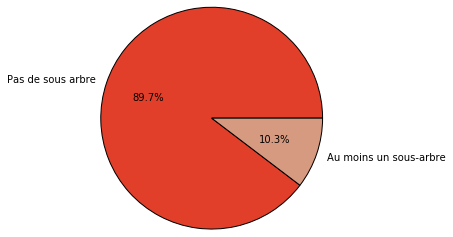

In [13]:
### sous-arbres
import pandas
import matplotlib.pyplot as plt
df = pandas.DataFrame.from_csv("sous_arbre.csv",0)
indexs = [x for x in df.index if 'pro' in x]
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
# newdf.columns.tolist()
newdf = df.loc[indexs," sousarbre"]
count = newdf.value_counts()-7

display(HTML("<h2>Sous arbres dans les annotations de Provocation</h2>"))

plt.pie(count.values, labels = ["Pas de sous arbre", "Au moins un sous-arbre"],    autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()


Concernant l'extrait Florence, nous entrons donc dans le détails pour voir si la rupture trouvée par nos annotateurs se trouve au même endroit dans chaque texte donné par l'algorithme . C'est le cas, puisque tous nos annotateurs trouvent la rupture au même endroit [Annexe xxx]. Cependant, cette rupture ne se trouve pas au même endroit que celle trouvée par nos annotateurs référents. Ainsi, même si le pourcentage de ruptures trouvées reste faible et que la rupture ne se trouve pas au même endroit que celle donnée par l'annotation de nos référents, cette corrélation amène à une conclusion relativement pertinente, qui est la suivante: l'unité "Je suis très amoureuse de Florence M." ne peut pas se rattacher à une unité précédemment énoncée. Ainsi, selon l'interprétation de nos annotateurs non experts, cette unité réfère à un tour de parole qui ne suit pas un déroulement classique de la conversation . 
En revanche, en suivant la même procédure pour les extraits Provocation, nous remarquons que chaque annotation diverge, les sous arbres ne sont jamais issus des mêmes unités, nous ne pouvons donc rien conclure de pertinent. 